# Big Data in Finance, Homework 2


**Tong Zhang, MSFE '19, TZhang19@gsb.columbia.edu** <BR>

**Goal:** To replicate Fama and French 5 factors and Momentum. 

**Delivery:** Please check the .zip file with .py code, .ipynb file and git log on Canvas.



## Setup

First, add fire_pytools module to the system path.

In [355]:
# add fire_pytools to system path
import sys
sys.path.append('./fire_pytools')

Then, import all modules needed in this homework.

In [425]:
# import modules
import pickle
import numpy as np
import pandas as pd
from fire_pytools.portools.sort_portfolios import *

And enable matplotlib for the last section.

In [426]:
# enable matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Download Data and Calculate Past 11-1 Returns
In this section, I have finished two tasks:

* Run stock_monthly.py after adding the functionality to calculate 11-1 returns, producing stock_monthly.pkl file in the same directory with this notebook.

* Run stock_annual.py, producing stock_annual.pkl file in the same directory with this notebook.

As the resulting files' size is huge, I choose not to push them to bitbucket. However, these two files can be easily reproduced by rerunning the two .py files mentioned above. 

## Report Statistics for CRets

I report the summary statistics per year for CRet I calculated.

In [436]:
# read monthly data with 11-1 returns
with open("stock_monthly.pkl", "rb") as f:
    df_month = pickle.load(f)
    
# create an 'eyear' column
df_month['eyear'] = df_month['date'].dt.year

In [437]:
# remove useless columns, for the convenience of exhibition
df_month.drop(labels=['dlret', 'dlretx', 'naics', 'prc', 'shrcd', 'shrout', 'siccd', 'ticker'], axis=1, inplace=True)

First, report the number of unique PERMNO per year.

In [438]:
# report number of unique permco per year
df_month.groupby('eyear')['permco'].nunique()

eyear
1925     516
1926     565
1927     608
1928     663
1929     752
1930     773
1931     763
1932     744
1933     727
1934     720
1935     740
1936     768
1937     791
1938     795
1939     801
1940     804
1941     806
1942     809
1943     824
1944     842
1945     867
1946     915
1947     949
1948     971
1949     995
1950    1024
1951    1039
1952    1052
1953    1063
1954    1067
        ... 
1989    7472
1990    7267
1991    7322
1992    7605
1993    8214
1994    8746
1995    9126
1996    9685
1997    9921
1998    9754
1999    9436
2000    9103
2001    8406
2002    7725
2003    7297
2004    7147
2005    7121
2006    7060
2007    7085
2008    6635
2009    6337
2010    6184
2011    6038
2012    5948
2013    5934
2014    6048
2015    6079
2016    5982
2017    5890
2018    5888
Name: permco, Length: 94, dtype: int64

Second, report the number of missing per year.

In [439]:
# report number of missing of cret per year
df_month.set_index('eyear')['cret'].isna().groupby('eyear').sum().astype('int32')

eyear
1925      520
1926     6548
1927     1174
1928     1228
1929     1886
1930     1888
1931     1171
1932      953
1933      678
1934      654
1935      609
1936      826
1937      900
1938      594
1939      346
1940      417
1941      346
1942      246
1943      232
1944      443
1945      480
1946      780
1947      675
1948      545
1949      424
1950      417
1951      419
1952      327
1953      302
1954      248
        ...  
1989     8884
1990     8794
1991     8271
1992    12199
1993    14855
1994    17642
1995    13371
1996    16890
1997    15608
1998    12954
1999    11331
2000    13586
2001     9335
2002     6716
2003     6512
2004     8176
2005     8922
2006     9189
2007    11239
2008     8690
2009     4973
2010     7351
2011     8081
2012     7266
2013     6776
2014     9038
2015     8941
2016     7409
2017     7403
2018     9336
Name: cret, Length: 94, dtype: int32

Then, report the average of CRet per year.

In [440]:
# average cret per year
df_month.set_index('eyear')['cret'].groupby('eyear').mean()

eyear
1925         NaN
1926         NaN
1927    0.157979
1928    0.332844
1929    0.260945
1930   -0.281965
1931   -0.378632
1932   -0.420885
1933    0.708066
1934    0.667589
1935    0.065235
1936    0.703902
1937    0.221582
1938   -0.330956
1939    0.132362
1940    0.022673
1941    0.005594
1942   -0.026798
1943    0.707788
1944    0.256148
1945    0.392929
1946    0.405606
1947   -0.135465
1948    0.072215
1949   -0.041064
1950    0.288846
1951    0.306206
1952    0.081833
1953    0.063229
1954    0.152095
          ...   
1989    0.127971
1990   -0.043420
1991    0.105149
1992    0.273660
1993    0.240120
1994    0.107268
1995    0.099080
1996    0.244005
1997    0.155983
1998    0.110433
1999    0.046650
2000    0.318680
2001   -0.035277
2002    0.042968
2003    0.146815
2004    0.489997
2005    0.137926
2006    0.147765
2007    0.129653
2008   -0.148995
2009   -0.197783
2010    0.424860
2011    0.168330
2012    0.004113
2013    0.177700
2014    0.186775
2015    0.002368
2016   -

Next, report the maximum CRet per year.

In [442]:
# max cret per year
df_month.set_index('eyear')['cret'].groupby('eyear').max()

eyear
1925           NaN
1926           NaN
1927      5.178082
1928     16.200000
1929     13.437826
1930      2.403409
1931      2.414417
1932      4.749999
1933     18.500001
1934     44.769231
1935      6.173913
1936     12.363636
1937      8.300741
1938      4.478261
1939      9.714286
1940      4.263158
1941      2.642960
1942      6.200000
1943     19.000001
1944      6.111111
1945      4.363636
1946      4.333333
1947      1.806250
1948      4.033333
1949      3.275862
1950      3.848485
1951      5.285714
1952      1.568896
1953      1.547619
1954      2.349911
           ...    
1989     20.388889
1990     13.800000
1991     29.000000
1992     43.000001
1993     51.000001
1994     18.333334
1995     29.838709
1996     44.538460
1997     23.666667
1998     28.600000
1999     45.258063
2000    436.684199
2001     18.000000
2002     16.516884
2003     32.761907
2004     38.315788
2005     14.429578
2006     12.659649
2007      7.609866
2008     10.897435
2009     53.500000
2010  

Finally, report the minimum CRet per year.

In [443]:
# min cret per year
df_month.set_index('eyear')['cret'].groupby('eyear').min()

eyear
1925         NaN
1926         NaN
1927   -0.926471
1928   -0.758466
1929   -0.867028
1930   -0.958042
1931   -0.938356
1932   -0.975000
1933   -0.962838
1934   -0.833333
1935   -0.879310
1936   -0.745454
1937   -0.786611
1938   -0.900000
1939   -0.768116
1940   -0.933333
1941   -0.875000
1942   -0.859375
1943   -0.529412
1944   -0.700000
1945   -0.622222
1946   -0.602190
1947   -0.808176
1948   -0.645833
1949   -0.928571
1950   -0.912281
1951   -0.807692
1952   -0.912000
1953   -0.885752
1954   -0.629630
          ...   
1989   -1.000000
1990   -1.000000
1991   -0.986111
1992   -0.999556
1993   -0.993750
1994   -0.997333
1995   -0.999000
1996   -0.976563
1997   -0.991675
1998   -0.998698
1999   -0.992063
2000   -0.994692
2001   -0.999693
2002   -0.999037
2003   -0.988277
2004   -0.968571
2005   -0.962921
2006   -0.953061
2007   -0.973750
2008   -0.991367
2009   -0.995836
2010   -0.967835
2011   -0.988889
2012   -0.991794
2013   -0.982186
2014   -0.999668
2015   -0.998531
2016   -

## Replicate MOM Factor
I handle MOM factor in this section at first, including both sorting and return calculation.

To make each section self-contained, let's first load data again.

In [445]:
# read monthly data with 11-1 returns
with open("stock_monthly.pkl", "rb") as f:
    df_month = pickle.load(f)

df_month['eyear'] = df_month['date'].dt.year

# remove useless columns
df_month.drop(labels=['dlret', 'dlretx', 'naics', 'prc', 'shrcd', 'shrout', 'siccd', 'ticker'], axis=1, inplace=True)

Sort portfolio monthly according to ME and CRet.

In [446]:
# sort for MOM
mom_port = sort_portfolios(data=df_month, quantiles={'melag': [0.5], 'cret': [0.3, 0.7]},
                           id_variables=['edate', 'permno', 'exchcd'],
                           exch_cd=[1])

NYSE breakpoints were calculated for melag.
Stocks were sorted according to breakpoints, starting in 1926-01-31 00:00:00
NYSE breakpoints were calculated for cret.
Stocks were sorted according to breakpoints, starting in 1927-01-31 00:00:00


In [447]:
mom_port.head(5)

edate   permno cretportfolio melagportfolio
0 1927-01-31  10022.0         cret3         melag1
1 1927-01-31  10030.0         cret2         melag2
2 1927-01-31  10049.0         cret3         melag2
3 1927-01-31  10057.0         cret1         melag1
4 1927-01-31  10065.0         cret3         melag2

Merge the portfolio classification with monthly data to calculate returns:

In [448]:
# merge df_month with MOM
df_mom = df_month.copy()
df_mom = df_mom.merge(mom_port, on=['edate', 'permno'])
df_mom.head(5)

edate  permno       date  exchcd  permco       ret  rankyear    retadj  \
0 1987-02-28   10000 1987-02-27     3.0  7952.0  0.000000    1986.0  0.000000   
1 1987-03-31   10000 1987-03-31     3.0  7952.0 -0.384615    1986.0 -0.384615   
2 1987-04-30   10000 1987-04-30     3.0  7952.0 -0.062500    1986.0 -0.062500   
3 1987-05-31   10000 1987-05-29     3.0  7952.0 -0.066667    1986.0 -0.066667   
4 1987-06-30   10000 1987-06-30     3.0  7952.0       NaN    1986.0  0.000000   

         me  mesum_permco  mesum     melag      cret  eyear cretportfolio  \
0  1.581531      1.581531    NaN  1.581531 -0.882143   1987         cret1   
1  0.973250      0.973250    NaN  1.581531 -0.875000   1987         cret1   
2  0.912422      0.912422    NaN  0.973250 -0.908451   1987         cret1   
3  0.851594      0.851594    NaN  0.912422 -0.937500   1987         cret1   
4       NaN           NaN    NaN  0.851594 -0.924623   1987         cret1   

  melagportfolio  
0         melag1  
1         melag1  
2         melag1  
3         melag1  
4         melag1

Calculate portfolio returns for each month:

In [449]:
# choose a window
time_idx = np.sort(df_mom['edate'].copy().unique())
mom_rets = pd.DataFrame(index=time_idx)

me_list = ['melag1', 'melag2']
cr_list = ['cret1', 'cret3']
for me in me_list:
    for cr in cr_list:
        # get a portfolio return series for each portfolio
        colname = me + "_" + cr
        mom_rets[colname] = np.nan

In [450]:
for i in range(mom_rets.index.size):
    curr_t = mom_rets.index[i]
    print(curr_t)
    for me in me_list:
        for cr in cr_list:
            colname = me + "_" + cr
            df_use = df_mom[df_mom['edate'] == curr_t]
            df_use = df_use[df_use['cretportfolio'] == cr]
            df_use = df_use[df_use['melagportfolio'] == me]
            #df_use = df_mom[(df_mom['edate']==curr_t) & (df_mom['cretportfolio']==cr) & (df_mom['melagportfolio']==me)]
            #print(df_use.shape[0])
            curr_r = (df_use['retadj'] * df_use['melag'] / df_use['melag'].sum()).sum()
            mom_rets.loc[curr_t, colname] = curr_r

1927-01-31 00:00:00
1927-02-28 00:00:00
1927-03-31 00:00:00
1927-04-30 00:00:00
1927-05-31 00:00:00
1927-06-30 00:00:00
1927-07-31 00:00:00
1927-08-31 00:00:00
1927-09-30 00:00:00
1927-10-31 00:00:00
1927-11-30 00:00:00
1927-12-31 00:00:00
1928-01-31 00:00:00
1928-02-29 00:00:00
1928-03-31 00:00:00
1928-04-30 00:00:00
1928-05-31 00:00:00
1928-06-30 00:00:00
1928-07-31 00:00:00
1928-08-31 00:00:00
1928-09-30 00:00:00
1928-10-31 00:00:00
1928-11-30 00:00:00
1928-12-31 00:00:00
1929-01-31 00:00:00
1929-02-28 00:00:00
1929-03-31 00:00:00
1929-04-30 00:00:00
1929-05-31 00:00:00
1929-06-30 00:00:00
1929-07-31 00:00:00
1929-08-31 00:00:00
1929-09-30 00:00:00
1929-10-31 00:00:00
1929-11-30 00:00:00
1929-12-31 00:00:00
1930-01-31 00:00:00
1930-02-28 00:00:00
1930-03-31 00:00:00
1930-04-30 00:00:00
1930-05-31 00:00:00
1930-06-30 00:00:00
1930-07-31 00:00:00
1930-08-31 00:00:00
1930-09-30 00:00:00
1930-10-31 00:00:00
1930-11-30 00:00:00
1930-12-31 00:00:00
1931-01-31 00:00:00
1931-02-28 00:00:00


1961-06-30 00:00:00
1961-07-31 00:00:00
1961-08-31 00:00:00
1961-09-30 00:00:00
1961-10-31 00:00:00
1961-11-30 00:00:00
1961-12-31 00:00:00
1962-01-31 00:00:00
1962-02-28 00:00:00
1962-03-31 00:00:00
1962-04-30 00:00:00
1962-05-31 00:00:00
1962-06-30 00:00:00
1962-07-31 00:00:00
1962-08-31 00:00:00
1962-09-30 00:00:00
1962-10-31 00:00:00
1962-11-30 00:00:00
1962-12-31 00:00:00
1963-01-31 00:00:00
1963-02-28 00:00:00
1963-03-31 00:00:00
1963-04-30 00:00:00
1963-05-31 00:00:00
1963-06-30 00:00:00
1963-07-31 00:00:00
1963-08-31 00:00:00
1963-09-30 00:00:00
1963-10-31 00:00:00
1963-11-30 00:00:00
1963-12-31 00:00:00
1964-01-31 00:00:00
1964-02-29 00:00:00
1964-03-31 00:00:00
1964-04-30 00:00:00
1964-05-31 00:00:00
1964-06-30 00:00:00
1964-07-31 00:00:00
1964-08-31 00:00:00
1964-09-30 00:00:00
1964-10-31 00:00:00
1964-11-30 00:00:00
1964-12-31 00:00:00
1965-01-31 00:00:00
1965-02-28 00:00:00
1965-03-31 00:00:00
1965-04-30 00:00:00
1965-05-31 00:00:00
1965-06-30 00:00:00
1965-07-31 00:00:00


1995-09-30 00:00:00
1995-10-31 00:00:00
1995-11-30 00:00:00
1995-12-31 00:00:00
1996-01-31 00:00:00
1996-02-29 00:00:00
1996-03-31 00:00:00
1996-04-30 00:00:00
1996-05-31 00:00:00
1996-06-30 00:00:00
1996-07-31 00:00:00
1996-08-31 00:00:00
1996-09-30 00:00:00
1996-10-31 00:00:00
1996-11-30 00:00:00
1996-12-31 00:00:00
1997-01-31 00:00:00
1997-02-28 00:00:00
1997-03-31 00:00:00
1997-04-30 00:00:00
1997-05-31 00:00:00
1997-06-30 00:00:00
1997-07-31 00:00:00
1997-08-31 00:00:00
1997-09-30 00:00:00
1997-10-31 00:00:00
1997-11-30 00:00:00
1997-12-31 00:00:00
1998-01-31 00:00:00
1998-02-28 00:00:00
1998-03-31 00:00:00
1998-04-30 00:00:00
1998-05-31 00:00:00
1998-06-30 00:00:00
1998-07-31 00:00:00
1998-08-31 00:00:00
1998-09-30 00:00:00
1998-10-31 00:00:00
1998-11-30 00:00:00
1998-12-31 00:00:00
1999-01-31 00:00:00
1999-02-28 00:00:00
1999-03-31 00:00:00
1999-04-30 00:00:00
1999-05-31 00:00:00
1999-06-30 00:00:00
1999-07-31 00:00:00
1999-08-31 00:00:00
1999-09-30 00:00:00
1999-10-31 00:00:00


Get MOM return according to French's website:

In [451]:
mom_rets['MOM'] = 0.5 * (mom_rets['melag1_cret3'] + mom_rets['melag2_cret3'] - mom_rets['melag1_cret1'] - mom_rets['melag2_cret1']) 

In [452]:
mom_rets['MOM'].values

array([ 0.0100114 , -0.01982371,  0.04136825, ..., -0.0163222 ,
       -0.0081121 ,  0.01491113])

In [453]:
# compare with F-F benchmark
mom_benchmark = pd.read_csv('ffmom.csv')
mom_benchmark = mom_benchmark.rename(columns={'Mom   ': 'MOM'})
mom_benchmark['MOM'] = mom_benchmark['MOM'].astype(float)/100
x = mom_rets['MOM'].values  # my MOM series
b = mom_benchmark['MOM'].values  # F-F's MOM series

# get correlation
np.corrcoef(x, b)  # 0.99107933, not bad!

array([[1.        , 0.99107933],
       [0.99107933, 1.        ]])

In [454]:
# net value
x = x.cumsum()
b = b.cumsum()

plt.figure(figsize=(8, 6))
plt.title('Replication of MOM')
plt.plot(x, 'r-', label="Replication")
plt.plot(b, 'k-', label="F-F MOM")
plt.legend()
plt.show()

## Replicate MKTRF Factor

I replicate the market portfolio in this section separately, as the market factor does not need portfolio sorting. According to French's website, the market holdings are reformulated for each month.

To make each section self-contained, let's first load data again.

In [455]:
# read monthly data with 11-1 returns
with open("stock_monthly.pkl", "rb") as f:
    df_month = pickle.load(f)

And then calculate market return for each month:

In [465]:
result = dict()
for t, g in df_month.groupby('edate'):
    # print(t)
    r = g['retadj'] * g['melag'] / g['melag'].sum()
    r = r.sum()
    result[t] = r
    
mkt = pd.DataFrame.from_dict(result, orient='index', columns=['mkt'])

mkt.head(10)

mkt
1925-12-31  0.000000
1926-01-31  0.000499
1926-02-28 -0.032840
1926-03-31 -0.063851
1926-04-30  0.036544
1926-05-31  0.012663
1926-06-30  0.053174
1926-07-31  0.030585
1926-08-31  0.028371
1926-09-30  0.005708

In [464]:
# compare with F-F benchmark
bench = pd.read_csv('ff5.csv')
bench['Mkt-RF'] = bench['Mkt-RF'].astype(float)/100
bench['RF'] = bench['RF'].astype(float)/100
bench['Mkt'] = bench['Mkt-RF'] + bench['RF']

In [466]:
mkt= mkt.reset_index()

In [470]:
mkt = mkt[mkt['index'] >= pd.Timestamp(1963, 7, 1, 0)]
mkt = mkt[mkt['index'] < pd.Timestamp(2018, 7, 1, 0)]

In [476]:
x = mkt['mkt'].values - bench['RF'].values
b = bench['Mkt-RF'].values

In [477]:
# calculate corr
np.corrcoef(x, b)

array([[1.        , 0.99725126],
       [0.99725126, 1.        ]])

In [479]:
plt.plot(x.cumsum(), 'r-', label='replication')
plt.plot(b.cumsum(), 'k-', label='F-F Mkt-rf')
plt.legend()
plt.show()

## Replicate HML

In [492]:
# read monthly data with 11-1 returns
with open("stock_monthly.pkl", "rb") as f:
    df_month = pickle.load(f)
    
# get annual data
with open("stock_annual.pkl", "rb") as f:
    df_annual = pickle.load(f)
    
# sort for INV
hml_port = sort_portfolios(data=df_annual, quantiles={'mesum_june': [0.5], 'beme': [0.3, 0.7]},
                           id_variables=['rankyear', 'permco', 'exchcd'],
                           exch_cd=[1])

# merge annual data with portfolio classes
hml_newport = hml_port.merge(df_annual[['rankyear', 'permco', 'mesum_june']].copy(), on=['rankyear', 'permco'])
hml_newport.head(5)

# merge with monthly data
df_month = df_month.reset_index()
df_look = df_month.copy()
hml_data = df_look.merge(hml_newport, on=['rankyear', 'permco'])
hml_data.head(10)

# calculate returns
def return_calc(df):
    try:
        r = df['retadj'] * df['melag'] / df['melag'].sum()
        r = r.sum()
        return r
    except:
        print("asdasdda")
        raise Exception
        
ports=hml_data.groupby(['edate', 'bemeportfolio', 'mesum_juneportfolio'], group_keys=False).apply(return_calc)
ports.head(5)

NYSE breakpoints were calculated for mesum_june.
Stocks were sorted according to breakpoints, starting in 1926.0
NYSE breakpoints were calculated for beme.
Stocks were sorted according to breakpoints, starting in 1926.0


edate       bemeportfolio  mesum_juneportfolio
1926-07-31  beme1          mesum_june1            0.010874
                           mesum_june2            0.056104
            beme2          mesum_june1            0.008190
                           mesum_june2            0.019026
            beme3          mesum_june1           -0.007039
dtype: float64

In [493]:
ports = ports.reset_index()

# get portfolio returns
def get_v(df):
    me1beme1 = df[(df['bemeportfolio']=='beme1') & (df['mesum_juneportfolio']=='mesum_june1')][0].values[0]
    me2beme1 = df[(df['bemeportfolio']=='beme1') & (df['mesum_juneportfolio']=='mesum_june2')][0].values[0]
    me1beme3 = df[(df['bemeportfolio']=='beme3') & (df['mesum_juneportfolio']=='mesum_june1')][0].values[0]
    me2beme3 = df[(df['bemeportfolio']=='beme3') & (df['mesum_juneportfolio']=='mesum_june2')][0].values[0]
    me1beme2 = df[(df['bemeportfolio']=='beme2') & (df['mesum_juneportfolio']=='mesum_june1')][0].values[0]
    me2beme2 = df[(df['bemeportfolio']=='beme2') & (df['mesum_juneportfolio']=='mesum_june2')][0].values[0]
    
    #r = 0.5 * (me1inv1+me2inv1-me1inv3-me2inv3)
    df['me1beme1'] = me1beme1
    df['me2beme1'] = me2beme1
    df['me1beme3'] = me1beme3
    df['me2beme3'] = me2beme3
    df['me1beme2'] = me1beme2
    df['me2beme2'] = me2beme2
    return df

my_hml = ports.groupby('edate', group_keys=False).apply(get_v)
my_hml = my_hml.drop_duplicates(subset=['edate'], keep='first')

# calculate HML factor
my_hml = my_hml[my_hml.edate>=pd.Timestamp(1963, 7, 31, 0)]
my_hml = my_hml[my_hml.edate<=pd.Timestamp(2018, 6, 30, 0)]
my_hml['factor'] = (my_hml['me1beme3']+my_hml['me2beme3']-my_hml['me1beme1']-my_hml['me2beme1']) * 0.5

my_hml.shape[0]

660

[[1.         0.94518845]
 [0.94518845 1.        ]]


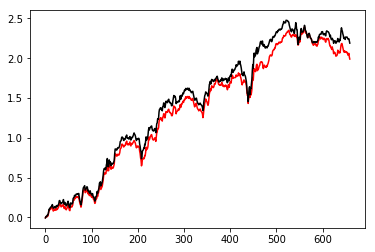

In [494]:
# read F-F benchmark
hml_ff = pd.read_csv('ff5.csv')
hml_benchmark = hml_ff['HML'].astype(float)/100
hml_benchmark.shape[0]

x = my_hml['factor'].values # my HML
b = hml_benchmark.values

# correlation
print(np.corrcoef(x, b))

x = x.cumsum()
b = b.cumsum()
plt.plot(x, 'r-')
plt.plot(b, 'k-')

## Replicate CMA

In [495]:
# read monthly data with 11-1 returns
with open("stock_monthly.pkl", "rb") as f:
    df_month = pickle.load(f)
    
# get annual data
with open("stock_annual.pkl", "rb") as f:
    df_annual = pickle.load(f)
    
# sort for INV
inv_port = sort_portfolios(data=df_annual, quantiles={'mesum_june': [0.5], 'inv': [0.3, 0.7]},
                           id_variables=['rankyear', 'permco', 'exchcd'],
                           exch_cd=[1])

# merge annual data with portfolio classes
inv_newport = inv_port.merge(df_annual[['rankyear', 'permco', 'mesum_june']].copy(), on=['rankyear', 'permco'])
inv_newport.head(5)

# merge with monthly data
df_month = df_month.reset_index()
df_look = df_month.copy()
inv_data = df_look.merge(inv_newport, on=['rankyear', 'permco'])
inv_data.head(10)

# calculate returns
def return_calc(df):
    try:
        r = df['retadj'] * df['melag'] / df['melag'].sum()
        r = r.sum()
        return r
    except:
        print("asdasdda")
        raise Exception
        
ports=inv_data.groupby(['edate', 'invportfolio', 'mesum_juneportfolio'], group_keys=False).apply(return_calc)
ports.head(5)

NYSE breakpoints were calculated for mesum_june.
Stocks were sorted according to breakpoints, starting in 1926.0
NYSE breakpoints were calculated for inv.
Stocks were sorted according to breakpoints, starting in 1952.0


edate       invportfolio  mesum_juneportfolio
1952-07-31  inv1          mesum_june1            0.009221
                          mesum_june2            0.014910
            inv2          mesum_june1            0.009220
                          mesum_june2            0.004227
            inv3          mesum_june1            0.015661
dtype: float64

In [496]:
ports = ports.reset_index()

# get portfolio returns
def get_v(df):
    me1inv1 = df[(df['invportfolio']=='inv1') & (df['mesum_juneportfolio']=='mesum_june1')][0].values[0]
    me2inv1 = df[(df['invportfolio']=='inv1') & (df['mesum_juneportfolio']=='mesum_june2')][0].values[0]
    me1inv3 = df[(df['invportfolio']=='inv3') & (df['mesum_juneportfolio']=='mesum_june1')][0].values[0]
    me2inv3 = df[(df['invportfolio']=='inv3') & (df['mesum_juneportfolio']=='mesum_june2')][0].values[0]
    me1inv2 = df[(df['invportfolio']=='inv2') & (df['mesum_juneportfolio']=='mesum_june1')][0].values[0]
    me2inv2 = df[(df['invportfolio']=='inv2') & (df['mesum_juneportfolio']=='mesum_june2')][0].values[0]
    #r = 0.5 * (me1inv1+me2inv1-me1inv3-me2inv3)
    df['me1inv1'] = me1inv1
    df['me2inv1'] = me2inv1
    df['me1inv3'] = me1inv3
    df['me2inv3'] = me2inv3
    df['me1inv2'] = me1inv2
    df['me2inv2'] = me2inv2
    return df

my_cma = ports.groupby('edate', group_keys=False).apply(get_v)
my_cma = my_cma.drop_duplicates(subset=['edate'], keep='first')

# calculate CMA factor
my_cma = my_cma[my_cma.edate>=pd.Timestamp(1963, 7, 31, 0)]
my_cma = my_cma[my_cma.edate<=pd.Timestamp(2018, 6, 30, 0)]
my_cma['factor'] = (my_cma['me1inv1']+my_cma['me2inv1']-my_cma['me1inv3']-my_cma['me2inv3']) * 0.5

my_cma.shape[0]

660

[[1.         0.93067916]
 [0.93067916 1.        ]]


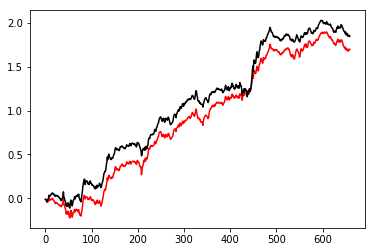

In [497]:
# read F-F benchmark
cma_ff = pd.read_csv('ff5.csv')
cma_benchmark = cma_ff['CMA'].astype(float)/100
cma_benchmark.shape[0]

x = my_cma['factor'].values # my HML
b = cma_benchmark.values

# correlation
print(np.corrcoef(x, b))

x = x.cumsum()
b = b.cumsum()
plt.plot(x, 'r-')
plt.plot(b, 'k-')

## Replicate RMW

In [498]:
# read monthly data with 11-1 returns
with open("stock_monthly.pkl", "rb") as f:
    df_month = pickle.load(f)
    
# get annual data
with open("stock_annual.pkl", "rb") as f:
    df_annual = pickle.load(f)
    
# sort for INV
rmw_port = sort_portfolios(data=df_annual, quantiles={'mesum_june': [0.5], 'opbe': [0.3, 0.7]},
                           id_variables=['rankyear', 'permco', 'exchcd'],
                           exch_cd=[1])

# merge annual data with portfolio classes
rmw_newport = rmw_port.merge(df_annual[['rankyear', 'permco', 'mesum_june']].copy(), on=['rankyear', 'permco'])
rmw_newport.head(5)

# merge with monthly data
df_month = df_month.reset_index()
df_look = df_month.copy()
rmw_data = df_look.merge(rmw_newport, on=['rankyear', 'permco'])
rmw_data.head(10)

# calculate returns
def return_calc(df):
    try:
        r = df['retadj'] * df['melag'] / df['melag'].sum()
        r = r.sum()
        return r
    except:
        print("asdasdda")
        raise Exception
        
ports=rmw_data.groupby(['edate', 'opbeportfolio', 'mesum_juneportfolio'], group_keys=False).apply(return_calc)
ports.head(5)

NYSE breakpoints were calculated for mesum_june.
Stocks were sorted according to breakpoints, starting in 1926.0
NYSE breakpoints were calculated for opbe.
Stocks were sorted according to breakpoints, starting in 1951.0


edate       opbeportfolio  mesum_juneportfolio
1951-07-31  opbe1          mesum_june1            0.065142
                           mesum_june2            0.102114
            opbe2          mesum_june1            0.068567
                           mesum_june2            0.078573
            opbe3          mesum_june1            0.042426
dtype: float64

In [499]:
ports = ports.reset_index()

# get portfolio returns
def get_v(df):
    me1opbe1 = df[(df['opbeportfolio']=='opbe1') & (df['mesum_juneportfolio']=='mesum_june1')][0].values[0]
    me2opbe1 = df[(df['opbeportfolio']=='opbe1') & (df['mesum_juneportfolio']=='mesum_june2')][0].values[0]
    me1opbe3 = df[(df['opbeportfolio']=='opbe3') & (df['mesum_juneportfolio']=='mesum_june1')][0].values[0]
    me2opbe3 = df[(df['opbeportfolio']=='opbe3') & (df['mesum_juneportfolio']=='mesum_june2')][0].values[0]
    me1opbe2 = df[(df['opbeportfolio']=='opbe2') & (df['mesum_juneportfolio']=='mesum_june1')][0].values[0]
    me2opbe2 = df[(df['opbeportfolio']=='opbe2') & (df['mesum_juneportfolio']=='mesum_june2')][0].values[0]
    #r = 0.5 * (me1inv1+me2inv1-me1inv3-me2inv3)
    df['me1opbe1'] = me1opbe1
    df['me2opbe1'] = me2opbe1
    df['me1opbe3'] = me1opbe3
    df['me2opbe3'] = me2opbe3
    df['me1opbe2'] = me1opbe2
    df['me2opbe2'] = me2opbe2
    return df

my_rmw = ports.groupby('edate', group_keys=False).apply(get_v)
my_rmw = my_rmw.drop_duplicates(subset=['edate'], keep='first')

# calculate RMW factor
my_rmw = my_rmw[my_rmw.edate>=pd.Timestamp(1963, 7, 31, 0)]
my_rmw = my_rmw[my_rmw.edate<=pd.Timestamp(2018, 6, 30, 0)]
my_rmw['factor'] = (my_rmw['me1opbe3']+my_rmw['me2opbe3']-my_rmw['me1opbe1']-my_rmw['me2opbe1']) * 0.5

my_cma.shape[0]

660

In [500]:
# read F-F benchmark
rmw_ff = pd.read_csv('ff5.csv')
rmw_benchmark = rmw_ff['RMW'].astype(float)/100
rmw_benchmark.shape[0]

x = my_rmw['factor'].values # my HML
b = rmw_benchmark.values

# correlation
print(np.corrcoef(x, b))

x = x.cumsum()
b = b.cumsum()
plt.plot(x, 'r-')
plt.plot(b, 'k-')

[[1.         0.95001639]
 [0.95001639 1.        ]]


## Replicate SMB
Replicate SMB according to French's website.

In [501]:
SMB_BM = (my_hml['me1beme3']+my_hml['me1beme2']+my_hml['me1beme1']-my_hml['me2beme3']-my_hml['me2beme2']-my_hml['me2beme1']) / 3

In [503]:
SMB_OP = (my_rmw['me1opbe3']+my_rmw['me1opbe2']+my_rmw['me1opbe1']-my_rmw['me2opbe3']-my_rmw['me2opbe2']-my_rmw['me2opbe1']) / 3

In [504]:
SMB_INV = (my_cma['me1inv1']+my_cma['me1inv2']+my_cma['me1inv3']-my_cma['me2inv1']-my_cma['me2inv2']-my_cma['me2inv3']) / 3

In [505]:
SMB = (SMB_BM.values + SMB_OP.values + SMB_INV.values) / 3

In [506]:
# read F-F benchmark
smb_ff = pd.read_csv('ff5.csv')
smb_benchmark = smb_ff['SMB'].astype(float)/100
smb_benchmark.shape[0]

x = SMB
b = smb_benchmark.values

# correlation
print(np.corrcoef(x, b))

x = x.cumsum()
b = b.cumsum()
plt.plot(x, 'r-')
plt.plot(b, 'k-')

[[1.        0.9855336]
 [0.9855336 1.       ]]


## Correlation and Plot

This section displays the correlation between my replicated factors and those in Ken French's website.

### Momentum Factor

#### Correlation

In [507]:
# compare with F-F benchmark
mom_benchmark = pd.read_csv('ffmom.csv')
mom_benchmark = mom_benchmark.rename(columns={'Mom   ': 'MOM'})
mom_benchmark['MOM'] = mom_benchmark['MOM'].astype(float)/100
x = mom_rets['MOM'].values  # my MOM series
b = mom_benchmark['MOM'].values  # F-F's MOM series

# get correlation
print("MOM Correlation:", np.corrcoef(x, b)[1, 0])  # 0.99107933, not bad!

MOM Correlation: 0.9910793324054964


#### Plot

In [508]:
# net value
x = x.cumsum()
b = b.cumsum()

plt.figure(figsize=(8, 6))
plt.title('Replication of MOM')
plt.plot(x, 'r-', label="Replication")
plt.plot(b, 'k-', label="F-F MOM")
plt.legend()
plt.show()

### MKTRF Factor

#### Correlation

In [518]:
# compare with F-F benchmark
bench = pd.read_csv('ff5.csv')
bench['Mkt-RF'] = bench['Mkt-RF'].astype(float)/100
bench['RF'] = bench['RF'].astype(float)/100
bench['Mkt'] = bench['Mkt-RF'] + bench['RF']

x = mkt['mkt'].values - bench['RF'].values
b = bench['Mkt-RF'].values

# calculate corr
print("MKTRF Correlation:", np.corrcoef(x, b)[1, 0])

MKTRF Correlation: 0.9972512567651065


#### Plot

In [519]:
plt.figure(figsize=(8, 6))
plt.plot(x.cumsum(), 'r-', label='replication')
plt.plot(b.cumsum(), 'k-', label='F-F Mkt-rf')
plt.legend()
plt.show()

### SMB Factor

#### Correlation

In [520]:
# read F-F benchmark
smb_ff = pd.read_csv('ff5.csv')
smb_benchmark = smb_ff['SMB'].astype(float)/100
smb_benchmark.shape[0]

x = SMB
b = smb_benchmark.values

# correlation
print("SMB Correlation:", np.corrcoef(x, b)[1, 0])

SMB Correlation: 0.9855335989823533


#### Plot

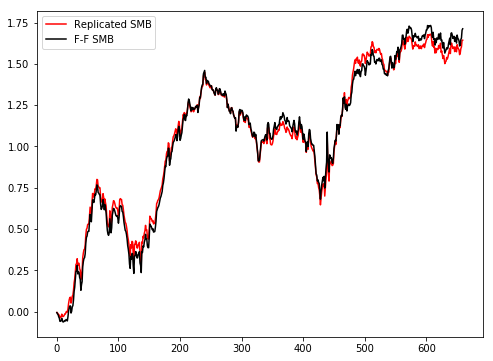

In [521]:
x = x.cumsum()
b = b.cumsum()
plt.figure(figsize=(8, 6))
plt.plot(x, 'r-', label="Replicated SMB")
plt.plot(b, 'k-', label="F-F SMB")
plt.legend()

### HML Factor

#### Correlation

In [523]:
# read F-F benchmark
hml_ff = pd.read_csv('ff5.csv')
hml_benchmark = hml_ff['HML'].astype(float)/100
hml_benchmark.shape[0]

x = my_hml['factor'].values # my HML
b = hml_benchmark.values

# correlation
print("HML Correlation:", np.corrcoef(x, b)[1, 0])

HML Correlation: 0.9451884536498181


#### Plot

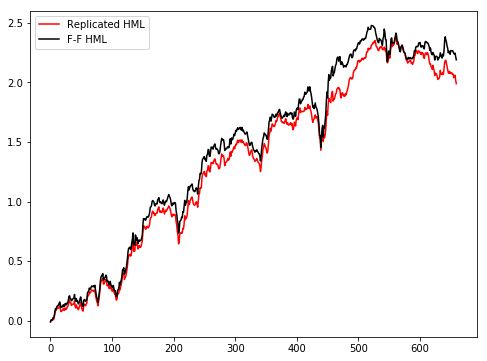

In [524]:
x = x.cumsum()
b = b.cumsum()
plt.figure(figsize=(8, 6))
plt.plot(x, 'r-', label='Replicated HML')
plt.plot(b, 'k-', label="F-F HML")
plt.legend()

### CMA Factor

#### Correlation

In [533]:
# read F-F benchmark
cma_ff = pd.read_csv('ff5.csv')
cma_benchmark = cma_ff['CMA'].astype(float)/100
cma_benchmark.shape[0]

x = my_cma['factor'].values # my HML
b = cma_benchmark.values

# correlation
print("CMA Correlation:", np.corrcoef(x, b)[1, 0])

CMA Correlation: 0.9306791621772014


#### Plot

In [534]:
x = x.cumsum()
b = b.cumsum()
plt.figure(figsize=(8, 6))
plt.plot(x, 'r-', label='Replicated CMA')
plt.plot(b, 'k-', label="F-F CMA")
plt.legend()

### RMW Factor

#### Correlation

In [536]:
# read F-F benchmark
rmw_ff = pd.read_csv('ff5.csv')
rmw_benchmark = rmw_ff['RMW'].astype(float)/100
rmw_benchmark.shape[0]

x = my_rmw['factor'].values # my HML
b = rmw_benchmark.values

# correlation
print("RMW Correlation:", np.corrcoef(x, b)[1, 0])

RMW Correlation: 0.9500163874795249


#### Plot

In [537]:
x = x.cumsum()
b = b.cumsum()
plt.figure(figsize=(8,6))
plt.plot(x, 'r-', label="Replicated RMW")
plt.plot(b, 'k-', label="F-F RMW")
plt.legend()